In [1]:
import pandas as pd

In [ ]:
# Save the file path to DataFrame
df = pd.read_csv("/Users/machome/Downloads/wine-clustering.csv")

# look at the first few rows
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Check the size of the dataset (rows, columns)
df.shape

(178, 13)

In [5]:
# Get summary statistics to understand scale and spread of variables
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# Check data types and confirm there are no missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the features to have mean 0 and standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA with all components first
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Cumulative explained variance
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components to reach at least 80% variance
n_components_80 = np.argmax(cum_var >= 0.80) + 1
n_components_80


/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


np.int64(5)

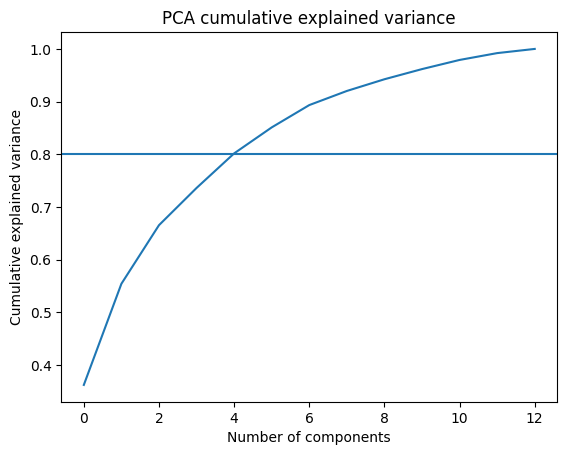

In [10]:
plt.plot(cum_var)
plt.axhline(0.80)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA cumulative explained variance")
plt.show()


In [11]:
# Fit PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape


/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


(178, 4)

/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/machome/mambaforge/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: d

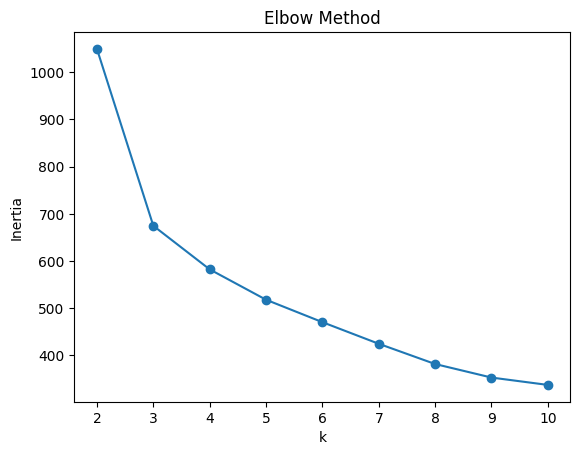

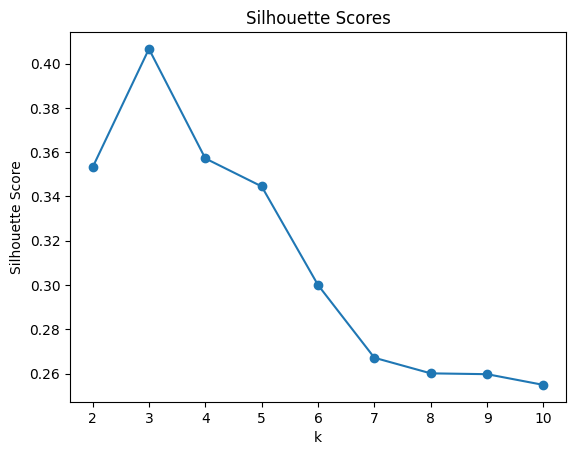

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2, 11)
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca, labels))

# Plot elbow
import matplotlib.pyplot as plt

plt.plot(ks, inertias, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot silhouette
plt.plot(ks, silhouettes, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()


In [13]:
# Final k-means with k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X_pca)

# Check cluster sizes
import pandas as pd
pd.Series(labels_km).value_counts().sort_index()


0    51
1    65
2    62
Name: count, dtype: int64

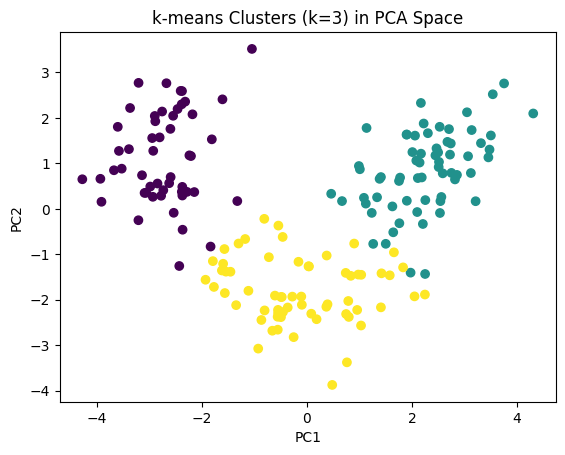

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("k-means Clusters (k=3) in PCA Space")
plt.show()


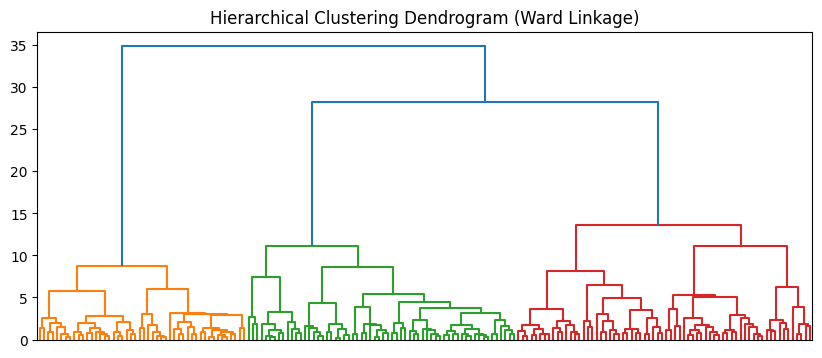

0    48
1    62
2    68
Name: count, dtype: int64

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward linkage
Z = linkage(X_pca, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 4))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.show()

# Cut tree into 3 clusters
labels_hc = fcluster(Z, 3, criterion="maxclust") - 1

# Show cluster sizes
import pandas as pd
pd.Series(labels_hc).value_counts().sort_index()
